In [3]:
%pylab inline
import nidaqmx

Populating the interactive namespace from numpy and matplotlib


In [6]:
# create and configure nidaq task
DEV = "Dev2"
CHAN_OUT = "ao0"

RATE = 1e3 * 10
DT = 1. / RATE
VMAX = 5.


def setout(val):
    with nidaqmx.Task() as outtask:
        outtask.ao_channels.add_ao_voltage_chan(
            "/%s/%s" % (DEV, CHAN_OUT), 
            min_val=-VMAX, max_val=VMAX)

    #     outtask.timing.cfg_samp_clk_timing(rate=RATE)
    #         samps_per_chan=len(sig), 
    #         sample_mode=nidaqmx.constants.AcquisitionType.CONTINUOUS)

        outtask.write(3.3 if val else 0, timeout=10, auto_start=True)
        outtask.stop()

In [78]:
setout(0)
setout(1)
setout(0)

# Analyze

In [54]:
def getPSD(tdata):
    fs = fft.rfftfreq(len(tdata), DT)

    Z = real(z * conj(z))
    Z /= float(len(tdata) * RATE)
    Z[1:] *= 2.

#     assert ((sum(Z)* 1./DT) - sum(tdata**2)) < 1e-6
    
    return Z, fs


Text(0,0.5,'PSD (V / $\\sqrt{\\mathsf{Hz}}$ )')

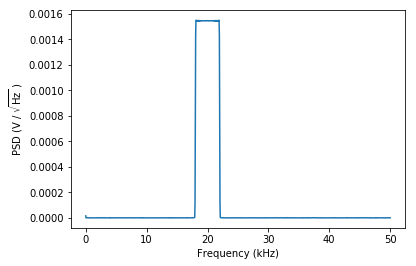

In [55]:

figure()

Z, fs = getPSD(indata)

plot(fs / 1e3, Z**0.5)

xlabel("Frequency (kHz)")
ylabel("PSD (V / $\sqrt{\mathsf{Hz}}$ )")

Text(0,0.5,'Normalized Response')

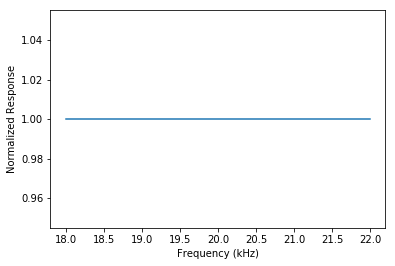

In [56]:
Zdrive, _ = getPSD(sig)

mask = Zdrive > mean(Zdrive)

figure()

plot(fs[mask] / 1e3, Z[mask] / Zdrive[mask])

xlabel("Frequency (kHz)")
ylabel("Normalized Response")
